In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Importing the files
trip_2 = pd.read_csv("202202-divvy-tripdata.csv")
trip_1 = pd.read_csv("202201-divvy-tripdata.csv")
trip_3 = pd.read_csv("202203-divvy-tripdata.csv")
trip_4 = pd.read_csv("202204-divvy-tripdata.csv")
trip_5 = pd.read_csv("202205-divvy-tripdata.csv")
trip_6 = pd.read_csv("202206-divvy-tripdata.csv")
trip_7 = pd.read_csv("202207-divvy-tripdata.csv")
trip_8 = pd.read_csv("202208-divvy-tripdata.csv")
trip_9 = pd.read_csv("202209-divvy-tripdata.csv")
trip_10 = pd.read_csv("202210-divvy-tripdata.csv")
trip_11 = pd.read_csv("202211-divvy-tripdata.csv")
trip_12 = pd.read_csv("202212-divvy-tripdata.csv")

In [4]:
# Merging all the dataframes into a single dataframe.

all_dfs = [trip_1, trip_2, trip_3, trip_4, trip_5, trip_6, trip_7, trip_8, trip_9, trip_10, trip_11, trip_12]
bike_trips = pd.concat(all_dfs)

In [5]:
# To get information about the dataframe.
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [6]:
#To convert object data type of start_time and end_time columns into datetime data type
start_times = pd.to_datetime(bike_trips["started_at"])
end_times = pd.to_datetime(bike_trips["ended_at"])

In [7]:
#Adding new column - ride_length (ended_at - started_at) to calculate the time travelled
bike_trips["ride_length"] = end_times - start_times
bike_trips["ride_length"]

0        0 days 00:02:57
1        0 days 00:04:21
2        0 days 00:04:21
3        0 days 00:14:56
4        0 days 00:06:02
               ...      
181801   0 days 00:03:44
181802   0 days 00:12:59
181803   0 days 00:04:33
181804   0 days 00:03:56
181805   0 days 00:08:03
Name: ride_length, Length: 5667717, dtype: timedelta64[ns]

In [8]:
# To get the updated information about the changes made in the data type of dataframe.
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
dtypes: float64(4), object(9), timedelta64[ns](1)
memory usage: 648.6+ MB


In [9]:
# Drop all rows with any NaN values removing any rides with duration less than 10 seconds
bike_trips_cleaned = bike_trips.dropna()
bike_trips_cleaned = bike_trips_cleaned.loc[bike_trips_cleaned['ride_length'] > datetime.timedelta(seconds = 10)]

In [10]:
# Splitting and extracting the date from "started_at" column
bike_trips_cleaned["start_date"] = [i.split(" ")[0] for i in bike_trips_cleaned["started_at"]]
bike_trips_cleaned["start_date"]

0         2022-01-13
1         2022-01-10
2         2022-01-25
3         2022-01-04
4         2022-01-20
             ...    
181801    2022-12-05
181802    2022-12-14
181803    2022-12-08
181804    2022-12-28
181805    2022-12-09
Name: start_date, Length: 4350734, dtype: object

In [11]:
# Converting start_date into datetime data type
bike_trips_cleaned["start_date"] = pd.to_datetime(bike_trips_cleaned["start_date"])

In [12]:
# Finding the weekday of the date
bike_trips_cleaned['week_day'] = bike_trips_cleaned["start_date"].apply(lambda x: x.weekday())
bike_trips_cleaned['week_day'].unique()

array([3, 0, 1, 6, 5, 4, 2], dtype=int64)

In [13]:
# Converting weekday values into weekday
dict1 = { 0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
bike_trips_cleaned['week_day'] = bike_trips_cleaned['week_day'].apply(lambda y: dict1[y])
bike_trips_cleaned['week_day']

0          Thursday
1            Monday
2           Tuesday
3           Tuesday
4          Thursday
            ...    
181801       Monday
181802    Wednesday
181803     Thursday
181804    Wednesday
181805       Friday
Name: week_day, Length: 4350734, dtype: object

In [14]:
# To sort the dataframe by start date in ascending order
bike_trips_cleaned.sort_values(by=['started_at'], inplace=True, ascending=True)

In [15]:
# To save the cleaned file for further transformation of data
#bike_trips_cleaned.to_csv('cleaned.csv')

In [16]:
# To import the cleaned data file
#cleaned_file = pd.read_csv("cleaned.csv")

In [17]:
# Print the cleaned dataframe and check for the unique values
cleaned_file = bike_trips_cleaned
for col in bike_trips_cleaned.columns:
    print(f"{col}: {bike_trips_cleaned[col].nunique()}")

ride_id: 4350734
rideable_type: 3
started_at: 3767187
ended_at: 3780352
start_station_name: 1554
start_station_id: 1270
end_station_name: 1595
end_station_id: 1280
start_lat: 591222
start_lng: 557791
end_lat: 1380
end_lng: 1371
member_casual: 2
ride_length: 19539
start_date: 365
week_day: 7


In [18]:
# Checking for any dupilcate ride_id's
def get_duplicates(field: str) -> pd.DataFrame:
    """Display rows with duplicate ride_ids"""
    vc = cleaned_file[field].value_counts()
    duplicate_index = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicate_index)
    print(f"Number of duplicates for {field}: {n_duplicates}")
    if n_duplicates > 0:
        print("Sample rows:")
        mask = cleaned_file[field].isin(duplicate_index)
        return cleaned_file[mask].sort_values(by = field).head(4)
    return

get_duplicates('ride_id')

Number of duplicates for ride_id: 0


In [19]:
# To extract year and month from start date column
cleaned_file['year'] = pd.DatetimeIndex(cleaned_file["start_date"]).year
cleaned_file['month'] = pd.DatetimeIndex(cleaned_file["start_date"]).month

In [20]:
# To convert object datatype to timedelta
cleaned_file["ride_len"] = pd.to_timedelta(cleaned_file["ride_length"])


In [21]:
# The circle distance between the start and end station
def haversine(lat1, lon1, lat2, lon2):
    """
    haversine formula determining the great-circle distance between two points on a sphere
    """
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return 6371 * 2 * np.arcsin(np.sqrt(a))

cleaned_file['distance'] = haversine(cleaned_file['start_lat'],cleaned_file['start_lng'],cleaned_file['end_lat'],cleaned_file['end_lng'])

In [22]:
# To check if there are null values in dataframe
cleaned_file.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
start_date            0
week_day              0
year                  0
month                 0
ride_len              0
distance              0
dtype: int64

In [23]:
# To check if there are any duplicate values in dataframe
cleaned_file.duplicated().any()

False

In [24]:
# Print the cleaned dataframe
cleaned_file


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,week_day,year,month,ride_len,distance
73479,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:01:43,2022-01-01,Saturday,2022,1,0 days 00:01:43,0.000000
68510,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,Broadway & Waveland Ave,13325,Broadway & Barry Ave,13137,41.949073,-87.648633,41.937582,-87.644098,casual,0 days 00:03:39,2022-01-01,Saturday,2022,1,0 days 00:03:39,1.331640
64490,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875919,-87.631194,41.875933,-87.630585,casual,0 days 00:30:58,2022-01-01,Saturday,2022,1,0 days 00:30:58,0.050469
73485,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:28:53,2022-01-01,Saturday,2022,1,0 days 00:28:53,0.000000
73478,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:28:29,2022-01-01,Saturday,2022,1,0 days 00:28:29,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,78090C14B6003F5D,classic_bike,2022-12-31 23:57:18,2023-01-01 00:21:40,Wabash Ave & 9th St,TA1309000010,Clark St & Elm St,TA1307000039,41.870769,-87.625734,41.902973,-87.631280,member,0 days 00:24:22,2022-12-31,Saturday,2022,12,0 days 00:24:22,3.610232
166964,207B82AF834747FD,electric_bike,2022-12-31 23:58:01,2023-01-01 00:06:40,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Troy St & North Ave,15653,41.901250,-87.677353,41.909769,-87.705280,casual,0 days 00:08:39,2022-12-31,Saturday,2022,12,0 days 00:08:39,2.497784
148852,390512AD1B791E95,classic_bike,2022-12-31 23:58:41,2023-01-01 00:16:53,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.867888,-87.623041,41.867888,-87.623041,casual,0 days 00:18:12,2022-12-31,Saturday,2022,12,0 days 00:18:12,0.000000
148996,017486468322F08A,electric_bike,2022-12-31 23:59:01,2023-01-01 00:16:50,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.868109,-87.623071,41.867888,-87.623041,member,0 days 00:17:49,2022-12-31,Saturday,2022,12,0 days 00:17:49,0.024738


# Analysis

In [26]:
# To calculate mean ride length of all types of users
mean_ride_length = cleaned_file["ride_len"].mean()
print('users : ',mean_ride_length)


users :  0 days 00:17:10.103787314


In [27]:
# To calculate mean ride length for members and casuals
mean_ride_length_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mean_ride_length_member = mean_ride_length_member["ride_len"].mean()
print('member : ',mean_ride_length_member)

mean_ride_length_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mean_ride_length_casual = mean_ride_length_casual["ride_len"].mean()
print('casual :', mean_ride_length_casual)

member :  0 days 00:12:30.740849682
casual : 0 days 00:24:04.352162581


In [28]:
# To calculate the rides taken by members and casuals
bike_trips_cleaned.groupby('member_casual').size()

member_casual
casual    1752327
member    2598407
dtype: int64

In [29]:
# Calculate the mode of week_day for all types of users
mode_week_day_users= cleaned_file["week_day"].mode().iloc[0]
mode_week_day_users

'Saturday'

In [30]:
# To calculate mode of week_day for member
mode_week_day_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mode_week_day_member = mode_week_day_member["week_day"].mode().iloc[0]
mode_week_day_member

'Thursday'

In [32]:
# To calculate mode of week_day for casual
mode_week_day_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mode_week_day_casual = mode_week_day_casual["week_day"].mode().iloc[0]
mode_week_day_casual

'Saturday'

In [33]:
# Calculate the number of rides for users by week_day and sorting them in ascending order
dict1 = {"Sunday": 6, "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday":4, "Saturday": 5}
cleaned_file['week_day'] = cleaned_file['week_day'].apply(lambda y: dict1[y])


In [34]:
# counting the total user rised by weekday
count_users_week_day = cleaned_file.groupby('week_day')['ride_id'].count()
count_users_week_day = count_users_week_day.sort_index()
count_users_week_day

week_day
0    583501
1    605113
2    613732
3    643259
4    606164
5    702574
6    596391
Name: ride_id, dtype: int64

In [35]:
# Calculate the number of rides for member by week_day
count_member_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_id'].count()
count_member_week_day

week_day
0    373423
1    409371
2    410816
3    413982
4    358228
5    336464
6    296123
Name: ride_id, dtype: int64

In [36]:
# Calculate the number of rides for casual by week_day
count_casual_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_id'].count()
count_casual_week_day

week_day
0    210078
1    195742
2    202916
3    229277
4    247936
5    366110
6    300268
Name: ride_id, dtype: int64

In [37]:
# To plot graph of Weekday Vs Number Of Rides
plt.figure(figsize = (8,6))
plt.plot(count_users_week_day.index, count_users_week_day.values)
plt.plot(count_member_week_day.index, count_member_week_day.values)
plt.plot(count_casual_week_day.index, count_casual_week_day.values)
plt.title("Calculate the number of rides for different users by week_day by adding Count of ride_id to Values")
plt.legend(["user", "member", "casual"])
labels = count_users_week_day.[].tolist()
plt.xticks(count_casual_week_day.index, labels)
plt.show()

SyntaxError: invalid syntax (1275464058.py, line 8)

In [40]:
# Calculate the average ride_length for users by week_day
user_avg_ride_len_week_day = cleaned_file.groupby("week_day")['ride_len'].mean(numeric_only=False)
user_avg_ride_len_week_day

week_day
0   0 days 00:16:42.374515210
1   0 days 00:14:58.305043851
2   0 days 00:14:50.400696069
3   0 days 00:15:25.901215529
4   0 days 00:16:26.315528470
5   0 days 00:20:43.562959915
6   0 days 00:20:40.158419560
Name: ride_len, dtype: timedelta64[ns]

In [41]:
# Calculate the average ride_length for members by week_day
member_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_week_day = member_avg_ride_len_week_day.to_frame().sort_values(by=['week_day'])
member_avg_ride_len_week_day

,ride_len
week_day,
0,0 days 00:12:05.323252718
1,0 days 00:11:50.682415217
2,0 days 00:11:54.212450342
3,0 days 00:12:05.210538139
4,0 days 00:12:17.328503076
5,0 days 00:14:03.379122283
6,0 days 00:13:55.506475349


In [42]:
# Calculate the average ride_length for casual by week_day
casual_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_week_day

week_day
0   0 days 00:24:54.845471681
1   0 days 00:21:30.695348979
2   0 days 00:20:47.104703424
3   0 days 00:21:28.267820147
4   0 days 00:22:26.062092636
5   0 days 00:26:51.341645953
6   0 days 00:27:19.224412857
Name: ride_len, dtype: timedelta64[ns]

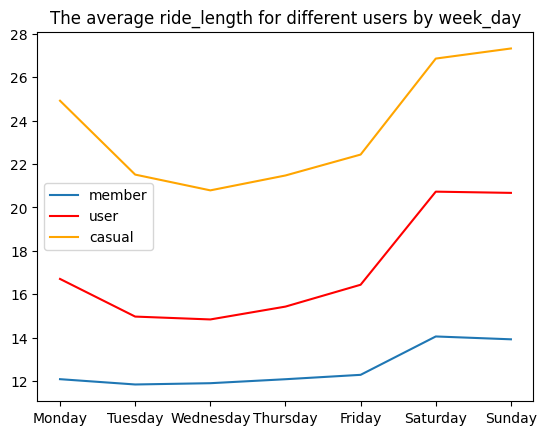

In [43]:
# To plot graph of Weekday Vs Average ride length
# total rides vs ride duration
# total rides for all rideable_type vs member casual
# total rides for all member casual by month
# member_casual vs start_time
# member_casual vs day_type
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(user_avg_ride_len_week_day/pd.Timedelta(minutes=1), c='r')
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1), c='orange')
plt.title("The average ride_length for different users by week_day")
plt.legend(["member", "user", "casual"])
labels = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(user_avg_ride_len_week_day.index, labels)
plt.show()

In [44]:
cleaned_file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,week_day,year,month,ride_len,distance
73479,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:01:43,2022-01-01,5,2022,1,0 days 00:01:43,0.000000
68510,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,Broadway & Waveland Ave,13325,Broadway & Barry Ave,13137,41.949073,-87.648633,41.937582,-87.644098,casual,0 days 00:03:39,2022-01-01,5,2022,1,0 days 00:03:39,1.331640
64490,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875919,-87.631194,41.875933,-87.630585,casual,0 days 00:30:58,2022-01-01,5,2022,1,0 days 00:30:58,0.050469
73485,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:28:53,2022-01-01,5,2022,1,0 days 00:28:53,0.000000
73478,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0 days 00:28:29,2022-01-01,5,2022,1,0 days 00:28:29,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,78090C14B6003F5D,classic_bike,2022-12-31 23:57:18,2023-01-01 00:21:40,Wabash Ave & 9th St,TA1309000010,Clark St & Elm St,TA1307000039,41.870769,-87.625734,41.902973,-87.631280,member,0 days 00:24:22,2022-12-31,5,2022,12,0 days 00:24:22,3.610232
166964,207B82AF834747FD,electric_bike,2022-12-31 23:58:01,2023-01-01 00:06:40,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Troy St & North Ave,15653,41.901250,-87.677353,41.909769,-87.705280,casual,0 days 00:08:39,2022-12-31,5,2022,12,0 days 00:08:39,2.497784
148852,390512AD1B791E95,classic_bike,2022-12-31 23:58:41,2023-01-01 00:16:53,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.867888,-87.623041,41.867888,-87.623041,casual,0 days 00:18:12,2022-12-31,5,2022,12,0 days 00:18:12,0.000000
148996,017486468322F08A,electric_bike,2022-12-31 23:59:01,2023-01-01 00:16:50,Indiana Ave & Roosevelt Rd,SL-005,Indiana Ave & Roosevelt Rd,SL-005,41.868109,-87.623071,41.867888,-87.623041,member,0 days 00:17:49,2022-12-31,5,2022,12,0 days 00:17:49,0.024738


In [45]:
# To extract important features of the dataframe into a new dataframe
final_file = cleaned_file[["ride_id", "rideable_type", "ride_len", "week_day", "year", "month", "member_casual", "distance"]]

In [46]:
# To get the information of the dataframe
final_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4350734 entries, 73479 to 96680
Data columns (total 8 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   ride_len       timedelta64[ns]
 3   week_day       int64          
 4   year           int64          
 5   month          int64          
 6   member_casual  object         
 7   distance       float64        
dtypes: float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 298.7+ MB


# Data Visualization

In [47]:
# To check the number of rides in each type over past 12 months
member_type = final_file["member_casual"].value_counts()
member_type

member    2598407
casual    1752327
Name: member_casual, dtype: int64

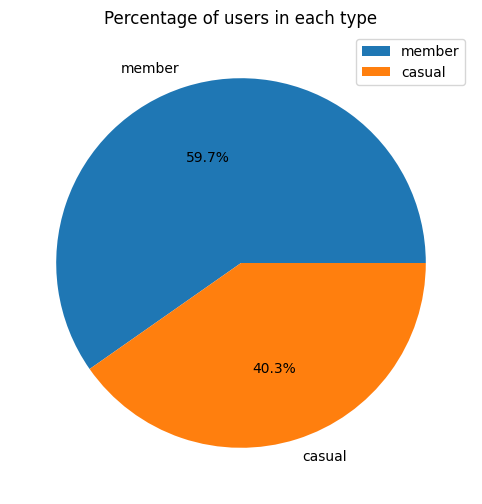

In [48]:
# To plot the pie chart of users in each type
plt.figure(figsize = (8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [49]:
# Average ride length by casual and member
list_month = []
list_x = ['member', 'casual']
list_y = [mean_ride_length_member.total_seconds()/60, mean_ride_length_casual.total_seconds()/60]


c:\Users\rahul\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average ride length of Member and Casual Riders')

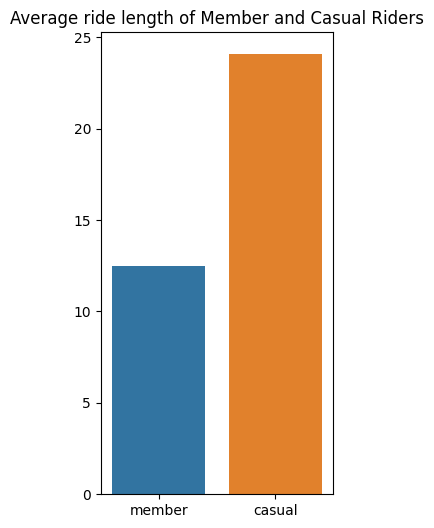

In [50]:
# Plot Average number of ride length by casual and members
plt.figure(figsize = (3,6))
sns.barplot(list_x, list_y)
plt.title("Average ride length of Member and Casual Riders")

In [62]:
# To check the number of users for a particulat rideable_type
ride_type = final_file.groupby("member_casual")["rideable_type"].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike      885905
               electric_bike     692032
               docked_bike       174390
member         classic_bike     1700692
               electric_bike     897715
Name: rideable_type, dtype: int64

In [63]:
# To segregate the number of users into member or casual riders based on ride type
list_member= []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

c:\Users\rahul\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

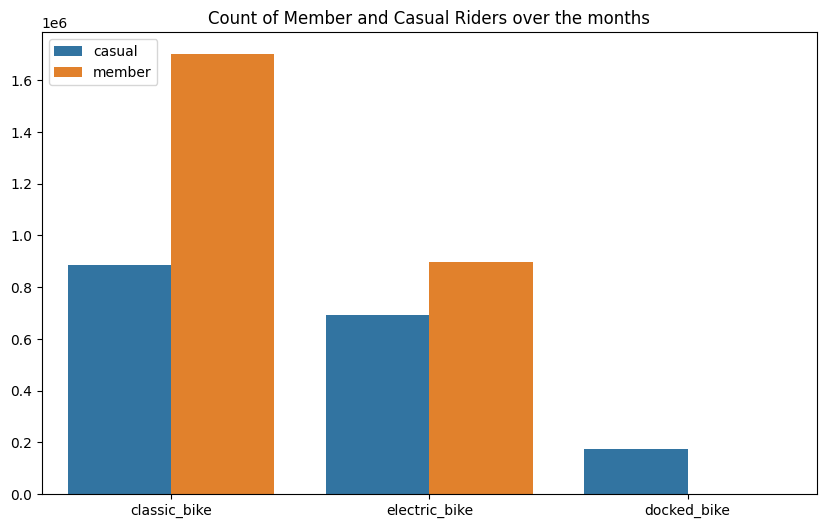

In [64]:
# To plot number of users into member or casual riders based on ride type
plt.figure(figsize = (10,6))
sns.barplot(list_x, list_y, hue = list_member)
plt.title("Count of Member and Casual Riders over the months")
